2023/01/02

# 主成分分析 principal component analysis; PCA

$$
\bm{Z} = \bm{X} \bm{U} \in \mathbb{R}^{P \times N}
$$

- $\bm{X} \in \mathbb{R}^{N \times P}$: データ
  - $N$: データ数
  - $P$: 説明変数の数
- $\bm{U} \in \mathbb{R}^{P \times P}$: 各列が $\bm{X}$ の共分散行列の各固有ベクトル


- 問題
  - $P$ 次元データ $\bm{x}_n \in \mathbb{R}^P$ を1次元 $z_n \in \mathbb{R}$ に変換したい．ただし情報損失は最小に抑えたい．
  - ⇔ $z_n$ の分散が最大になるように $\bm{x}_n$ を正射影できる $z$ 軸を探したい．
    - 正射影：軸とのなす角を $\theta$ として $z_n = \|\bm{x}_n\| \cos{\theta}$
- 答え：$z_n = \bm{u}^T \bm{x}_n$
  - $\bm{u} \in \mathbb{R}^P$: $\bm{X}$ の共分散行列の固有値最大の固有ベクトル
- 導出
  - 前提：原点を通る軸を探すので，よくフィットさせるためにデータを中心化しておく．
    - 平均が0になるので，共分散行列は $\bm{\Sigma} = \frac{1}{N} \bm{X}^T \bm{X}$ となる．
  - $z$ 軸方向の単位ベクトルを $\bm{u}$ とすると，$\bm{x}_n$ を $z$ 軸に正射影した値は $z = \|\bm{x}_n\| \cos{\theta} = \|\bm{x}_n\| \cdot \frac{\bm{u}^T \bm{x}_n}{\|\bm{u}\| \|\bm{x}_n\|} = \bm{u}^T \bm{x}_n$
    - 全データを変換して並べると $\bm{z} = \bm{X} \bm{u} \in \mathbb{R}^{N}$
  - $z_n$ の分散は $\frac{1}{N} \sum_{n=1}^N z_n^2 = \frac{1}{N} \bm{z}^T \bm{z} = \frac{1}{N} (\bm{X}\bm{u})^T (\bm{X}\bm{u}) = \frac{1}{N} \bm{u}^T \bm{X}^T \bm{X} \bm{u} = \bm{u}^T \bm{\Sigma} \bm{u}$
  - これを最大化する $\bm{u}$ は $\bm{\Sigma}$ の最大固有値に対応する固有ベクトルにほかならない．
    - （詳細）これは $\bm{\Sigma}$ の二次形式であり，分散でもあるので非負（半正定値）．
    - 半正定値対称行列の二次形式の最大値は最大固有値であり，$\bm{u}$ はそれに対応する固有ベクトルである．
- 参考
  - http://ibis.t.u-tokyo.ac.jp/suzuki/lecture/2015/dataanalysis/L7.pdf
    - p. 10
  - CS学部講義：コンピュータ概論III(2020)，データサイエンス(2021)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X = (X - X.mean(0)) # 中心化
X.shape             # (N, P)

(150, 4)

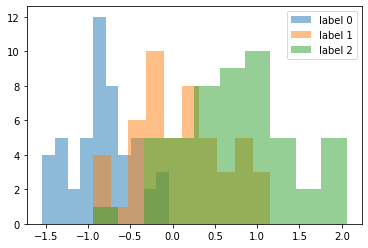

In [2]:
# 0番目の説明変数だけでは入り乱れていてあまり識別できない
for label in set(y):
    plt.hist(X[y==label, 0], alpha=0.5, label=f"label {label}")
plt.legend()

In [3]:
Σ = np.cov(X.T)         # 共分散行列
λ, U = np.linalg.eig(Σ) # 共分散行列の固有値，固有ベクトル
Z = X @ U               # 変換

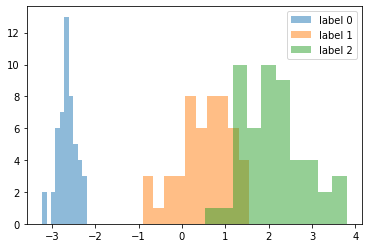

In [4]:
# 第1主成分だけでもかなり識別できる
for label in set(y):
    plt.hist(Z[y==label, 0], alpha=0.5, label=f"label {label}")
plt.legend()

## 固有値・主成分の性質

In [5]:
# 変換後は無相関になっている（相関行列が単位行列）
np.corrcoef(Z.T)

array([[ 1.00000000e+00, -2.11849690e-16, -9.32925148e-17,
         3.13810189e-15],
       [-2.11849690e-16,  1.00000000e+00, -3.48314344e-15,
         4.31571478e-15],
       [-9.32925148e-17, -3.48314344e-15,  1.00000000e+00,
         5.33266449e-15],
       [ 3.13810189e-15,  4.31571478e-15,  5.33266449e-15,
         1.00000000e+00]])

In [6]:
# 固有値の平方根は標準偏差と等しい
print(Z.std(0, ddof=1))
print(λ**0.5)

[2.05626888 0.49261623 0.27965961 0.15438618]
[2.05626888 0.49261623 0.27965961 0.15438618]


In [7]:
# 共分散行列の固有ベクトル行列は直交行列
print(U.T)
print(np.linalg.inv(U))
print(U.T @ U)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]
[[ 1.00000000e+00  5.79397641e-16  1.38777878e-16  5.55111512e-17]
 [ 5.79397641e-16  1.00000000e+00 -2.71310752e-15  8.32667268e-16]
 [ 1.38777878e-16 -2.71310752e-15  1.00000000e+00  1.05471187e-15]
 [ 5.55111512e-17  8.32667268e-16  1.05471187e-15  1.00000000e+00]]


# scikit-learn
実用上最短コード

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

X, y = load_iris(return_X_y=True)
# 中心化・fit(固有値などの計算のみ)・変換
X = (X - X.mean(0))
pca = PCA().fit(X)
Z_ = pca.transform(X)

人力コードと比較

In [10]:
# 共分散行列
print(Σ)
print(pca.get_covariance())

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [11]:
# 固有値
print(λ)
print(pca.explained_variance_)

[4.22824171 0.24267075 0.0782095  0.02383509]
[4.22824171 0.24267075 0.0782095  0.02383509]


In [21]:
# 固有ベクトル：正反対のベクトルも解なので，解法により変わりうる
print(U)
print(pca.components_.T)    # 転置されていることに注意

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
[[ 0.36138659  0.65658877 -0.58202985 -0.31548719]
 [-0.08452251  0.73016143  0.59791083  0.3197231 ]
 [ 0.85667061 -0.17337266  0.07623608  0.47983899]
 [ 0.3582892  -0.07548102  0.54583143 -0.75365743]]


In [20]:
# 変換後
print(Z[:3])
print(Z_[:3])

[[-2.68412563e+00 -3.19397247e-01 -2.79148276e-02  2.26243707e-03]
 [-2.71414169e+00  1.77001225e-01 -2.10464272e-01  9.90265503e-02]
 [-2.88899057e+00  1.44949426e-01  1.79002563e-02  1.99683897e-02]]
[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]]
